<function matplotlib.pyplot.show(close=None, block=None)>

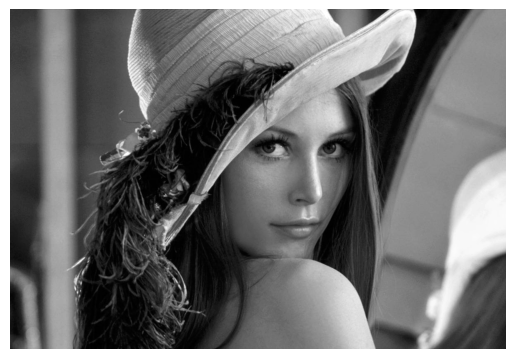

In [ ]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from PIL import Image
im_l = Image.open("/content/lena.jpg")
im_l= im_l.convert('L')

img= np.array(im_l)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show

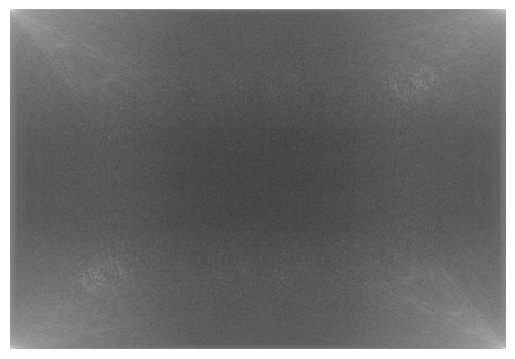

In [ ]:
F_img = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F_img)), cmap='gray')
plt.axis('off')
plt.show()

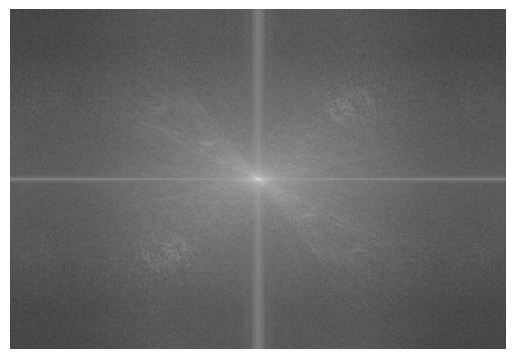

In [ ]:
Fshift= np.fft.fftshift(F_img)
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

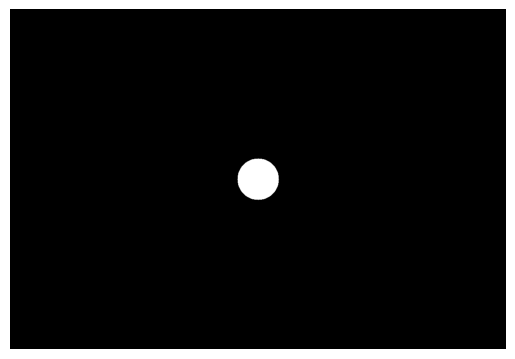

725.8794665783018


In [ ]:
M,N = img.shape
H= np.zeros((M,N), dtype= np.float32)
D0= 50
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v- N/2)**2)
    if D <= D0:
      H[u,v]=1
    else:
      H[u,v]=0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()
print(D)

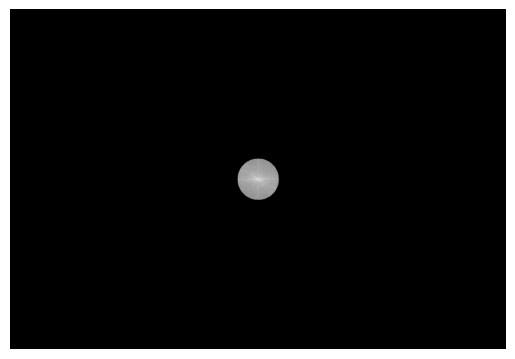

[[-0.+0.j -0.+0.j  0.+0.j ... -0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.-0.j -0.+0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j ... -0.+0.j  0.+0.j  0.-0.j]
 ...
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.-0.j -0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ... -0.+0.j -0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.+0.j  0.-0.j -0.+0.j]]


In [ ]:
G_out = Fshift * H
plt.imshow(np.log1p(np.abs(G_out)),cmap='gray')
plt.axis('off')
plt.show()
print(G_out)

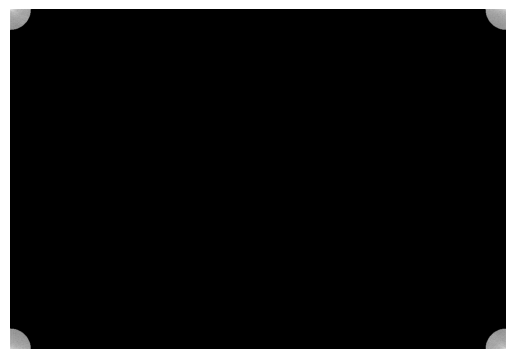

[[ 99283519.        +0.00000000e+00j   4068341.46221755+1.58788046e+07j
    8546286.97572719-4.82461618e+06j ...
    -193150.50357726-7.91457275e+06j   8546286.97572719+4.82461618e+06j
    4068341.46221755-1.58788046e+07j]
 [  3717227.06435176-4.00698180e+06j -11386093.878692  +6.72872668e+06j
   -7930133.14928328-3.51713520e+06j ...
    1900916.31626016+1.74308970e+06j  -1530553.97788432+4.63452229e+06j
   -2620081.68919544+1.75063537e+06j]
 [  2318493.7049448 -5.47735619e+06j  -4444502.78369102+1.62086965e+06j
    4456255.44236314+1.75898071e+05j ...
   -1436881.9976882 +2.23153093e+06j   -518663.63252278-3.86500689e+04j
   -1671596.24182104-1.31620779e+06j]
 ...
 [ -1630443.1261522 +1.61647298e+06j   1518812.27217398-2.92051437e+06j
    1271988.55874028+6.26702838e+05j ...
   -3235948.62168114-2.91628183e+06j   1375322.48478149-1.34256864e+03j
    -271692.4586107 -7.43802427e+05j]
 [  2318493.7049448 +5.47735619e+06j  -1671596.24182104+1.31620779e+06j
    -518663.63252278+3.86500689

In [ ]:
G= np.fft.ifftshift(G_out)

plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()
print(G)

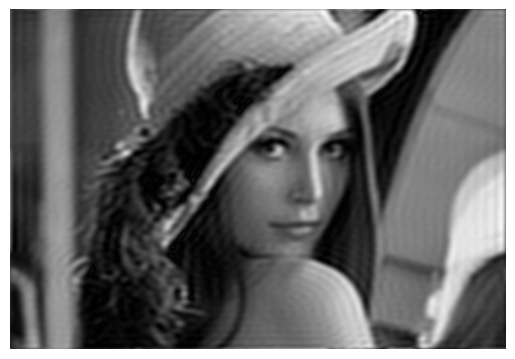

In [ ]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

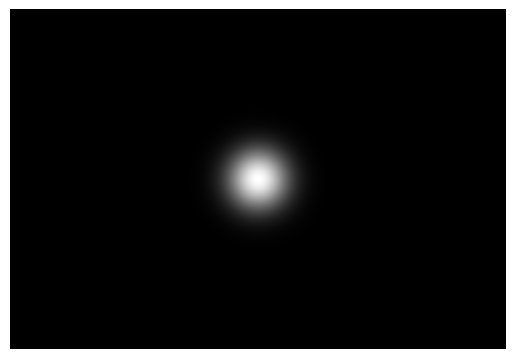

725.8794665783018


In [ ]:
M,N= img.shape
H= np.zeros((M,N), dtype= np.float32)
D0= 50
for u in range(M):
  for v in range(N):
     D = np.sqrt((u-M/2)**2 + (v- N/2)**2)
     H[u,v]= np.exp(-D**2/(2*D0*D0))


plt.imshow(H, cmap= 'gray')
plt.axis('off')
plt.show()
print(D)

## Butterworth - HW